In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Importing the KNN Classifier and RandomForest Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
path = '/content/drive/MyDrive/CD: Project/nordstrom-test1.csv'
data = pd.read_csv(path)
data.head()

,PRODUCT_NAME,SKU,CATEGORY,SUBCATEGORY,BRAND,PRICE_CURRENT,PRICE_RETAIL,REVIEW_RATING,REVIEW_COUNT,PROMOTION,COLOR,RunDate
0,McKay Water Resistant Bootie,4350576,Women,Shoes,UGG®,75.00,150.0,4.4,680,50% off,1,2022-03-13 08:11:45
1,Dorothy Flex Pump,4413570,Women,Shoes,MICHAEL Michael Kors,86.25,115.0,4.3,224,NaN,1,2022-03-13 08:11:45
2,Classic Femme Mini Wedge Bootie,5324754,Women,Shoes,UGG®,80.00,160.0,4.6,431,50% off,1,2022-03-13 08:11:45
3,Nizza Platform Sneaker,5507136,Women,Shoes,adidas,48.75,65.0,4.7,1001,NaN,1,2022-03-13 08:11:45
4,Becker Block Heel Platform Sandal,5527975,Women,Shoes,MICHAEL Michael Kors,108.75,145.0,4.5,19,NaN,1,2022-03-13 08:11:45


I did not notice any unnecessary coulumns in the dataset. Since the target is product_name. However, with this dataset I don't believe I can perform onehotencode or ordinal encode. 

In [10]:
data.duplicated().sum()

2

In [11]:
data = data.drop_duplicates() # this is to remove all duplicated data

In [12]:
data.isna().sum() # there are missing values in promotion

PRODUCT_NAME      0
SKU               0
CATEGORY          0
SUBCATEGORY       0
BRAND             0
PRICE_CURRENT     0
PRICE_RETAIL      0
REVIEW_RATING     0
REVIEW_COUNT      0
PROMOTION        21
COLOR             0
RunDate           0
dtype: int64

The only column that had missing value is PROMOTION. We will impute them by using the most_freq based on the most frequent promotion that occurs in Nordstrom 

In [13]:
for col in data: # this is to loop through the data to check for inconsistancy, NaN values
  print(f'-{col}:')
  print(data[col].unique())
  print("\n\n")

-PRODUCT_NAME:
['McKay Water Resistant Bootie' 'Dorothy Flex Pump'
 'Classic Femme Mini Wedge Bootie' 'Nizza Platform Sneaker'
 'Becker Block Heel Platform Sandal' 'Low Key Slide Sandal'
 'PureBoost 21 Primegreen Running Shoe' 'Odessa Crystal Block Heel Sandal'
 'Tule Block Heel Sandal' 'Jessin Ankle Wrap Sandal' 'Bay Slide Sandal'
 'Kora 2 Lug Chelsea Boot' 'Tianna Lug Chelsea Boot'
 'Dagger Waterproof Boot' 'Kamren Ankle Strap Pump'
 'Brielle Water Resistant Bootie' 'Adilette Lite Slide Sandal'
 'Isabelle Over the Knee Boot' 'Classy Penny Loafer' 'Kenley Sandal'
 'Sarendie Sandal' 'Genuine Shearling Lined Slipper'
 'Tory Charm Mammoth Geniune Shearling Mule' 'Isla Platform Sandal'
 'Vivy Pointed Toe Boot' 'Karala Pointed Toe Pump'
 'Josley Pointed Toe Pump' 'Fluffette Slipper'
 'Super Fluff Genuine Shearling Slingback Slipper'
 'Richie Espadrille Slingback Sandal' 'Serena Strappy Sandal'
 'UltraBoost 21 Running Shoe' 'Loren Pointed Toe Bootie'
 'Miller Cloud Sandal' 'Amory Ankle Stra

I did not find inconsistent data within this sales dataset 

In [14]:
data.head()

,PRODUCT_NAME,SKU,CATEGORY,SUBCATEGORY,BRAND,PRICE_CURRENT,PRICE_RETAIL,REVIEW_RATING,REVIEW_COUNT,PROMOTION,COLOR,RunDate
0,McKay Water Resistant Bootie,4350576,Women,Shoes,UGG®,75.00,150.0,4.4,680,50% off,1,2022-03-13 08:11:45
1,Dorothy Flex Pump,4413570,Women,Shoes,MICHAEL Michael Kors,86.25,115.0,4.3,224,NaN,1,2022-03-13 08:11:45
2,Classic Femme Mini Wedge Bootie,5324754,Women,Shoes,UGG®,80.00,160.0,4.6,431,50% off,1,2022-03-13 08:11:45
3,Nizza Platform Sneaker,5507136,Women,Shoes,adidas,48.75,65.0,4.7,1001,NaN,1,2022-03-13 08:11:45
4,Becker Block Heel Platform Sandal,5527975,Women,Shoes,MICHAEL Michael Kors,108.75,145.0,4.5,19,NaN,1,2022-03-13 08:11:45


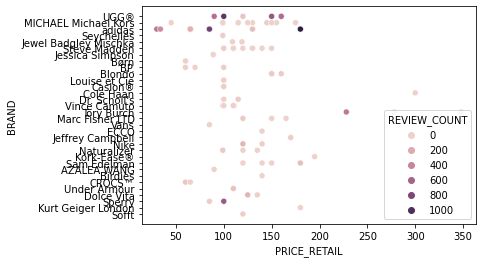

In [16]:
sns.scatterplot(data=data, x='PRICE_RETAIL', y='BRAND',hue='REVIEW_COUNT') # this is to see the distribution of items sold and number of review counts

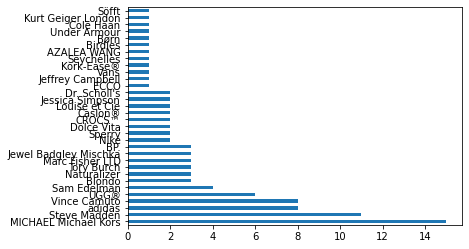

In [18]:
item_type = data['BRAND'].value_counts() # this is to see the distrubtion among brands with which item sold the most 
item_type.plot(kind='barh')

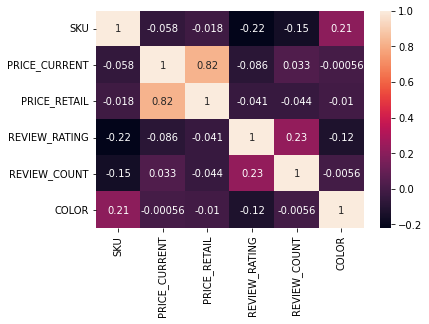

In [19]:
corr = data.corr() # this is a heatmap to illustrate correlation
sns.heatmap(corr, annot=True)